In [8]:
from confirm.outlaw.nb_util import setup_nb

setup_nb()
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import confirm.mini_imprint as ip
from confirm.models.ztest import ZTest1D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Validation

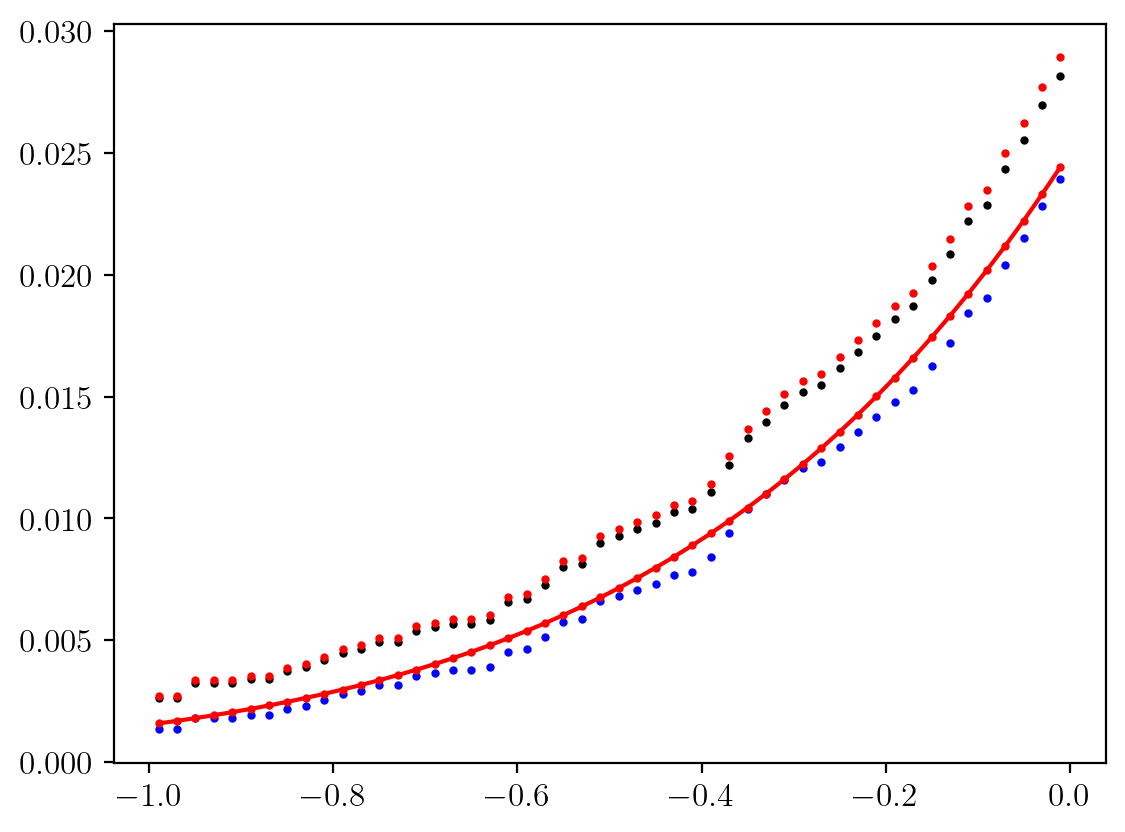

In [133]:
g = ip.cartesian_grid([-1], [1], n=[100], null_hypos=[ip.hypo("x < 0")])
# lam = -1.96 because we negated the statistics so we can do a less thanj
# comparison.
lam = -1.96
K = 8192
rej_df = ip.validate(ZTest1D, g, lam, K=K)
true_err = 1 - scipy.stats.norm.cdf(-g.get_theta()[:, 0] - lam)
TI_est = rej_df["TI_sum"] / rej_df["K"]

plt.plot(g.df["theta0"], TI_est, "bo", markersize=2)
plt.plot(g.df["theta0"], rej_df["TI_cp_bound"], "ko", markersize=2)
plt.plot(g.df["theta0"], rej_df["TI_bound"], "ro", markersize=2)
plt.plot(g.df["theta0"], true_err, "r-o", markersize=2)
plt.show()

In [134]:
std = scipy.stats.binom.std(n=K, p=true_err) / K
std

array([0.00044005, 0.00045446, 0.00046925, 0.00048444, 0.00050002, 0.000516  , 0.0005324 ,
       0.00054921, 0.00056644, 0.00058411, 0.00060221, 0.00062076, 0.00063975, 0.0006592 ,
       0.00067912, 0.0006995 , 0.00072036, 0.0007417 , 0.00076353, 0.00078585, 0.00080867,
       0.00083199, 0.00085582, 0.00088017, 0.00090504, 0.00093043, 0.00095635, 0.0009828 ,
       0.00100979, 0.00103732, 0.0010654 , 0.00109403, 0.00112321, 0.00115294, 0.00118323,
       0.00121409, 0.0012455 , 0.00127748, 0.00131002, 0.00134313, 0.0013768 , 0.00141105,
       0.00144586, 0.00148123, 0.00151718, 0.00155368, 0.00159075, 0.00162838, 0.00166657,
       0.00170531])

In [138]:
err = np.abs(TI_est - true_err).values
err

array([2.46096210e-04, 3.52036582e-04, 2.39109067e-05, 9.51544447e-05, 2.21304307e-04,
       2.32836455e-04, 3.74275207e-04, 2.79809374e-04, 3.16066140e-04, 2.39338070e-04,
       1.72146048e-04, 2.37028777e-04, 1.90332282e-04, 3.98772827e-04, 2.52523285e-04,
       3.62479168e-04, 4.85063722e-04, 7.42931445e-04, 8.92546597e-04, 5.68324186e-04,
       7.47474079e-04, 5.76173208e-04, 2.99253393e-04, 5.27779765e-04, 1.63855732e-04,
       3.06873235e-04, 4.69333291e-04, 6.52041511e-04, 7.33756712e-04, 1.08154263e-03,
       9.63853972e-04, 5.03661497e-04, 6.81004995e-05, 2.43301994e-05, 7.11183440e-06,
       1.39511718e-04, 5.44619876e-04, 6.13128021e-04, 7.12313723e-04, 8.43266724e-04,
       1.00709958e-03, 1.32701762e-03, 1.19382638e-03, 1.09698579e-03, 7.93555040e-04,
       1.13924666e-03, 7.92527455e-04, 7.31219429e-04, 4.68319313e-04, 4.93404030e-04])

In [140]:
err / std

array([0.55924364, 0.77462336, 0.05095507, 0.1964224 , 0.44259275, 0.451232  , 0.70300186,
       0.50947891, 0.55798501, 0.40975008, 0.28585722, 0.38183893, 0.29750949, 0.60493045,
       0.37183918, 0.51819471, 0.67336005, 1.00165558, 1.16897239, 0.72319564, 0.92432521,
       0.69252188, 0.34966661, 0.59963281, 0.18104849, 0.32981927, 0.49075569, 0.66345203,
       0.72664136, 1.042627  , 0.90468531, 0.46037297, 0.06063035, 0.02110271, 0.00601051,
       0.11491096, 0.43727037, 0.47995239, 0.54374283, 0.62783771, 0.73147619, 0.94044873,
       0.82568759, 0.74058928, 0.52304756, 0.73325605, 0.49820978, 0.44904739, 0.28100867,
       0.28933465])

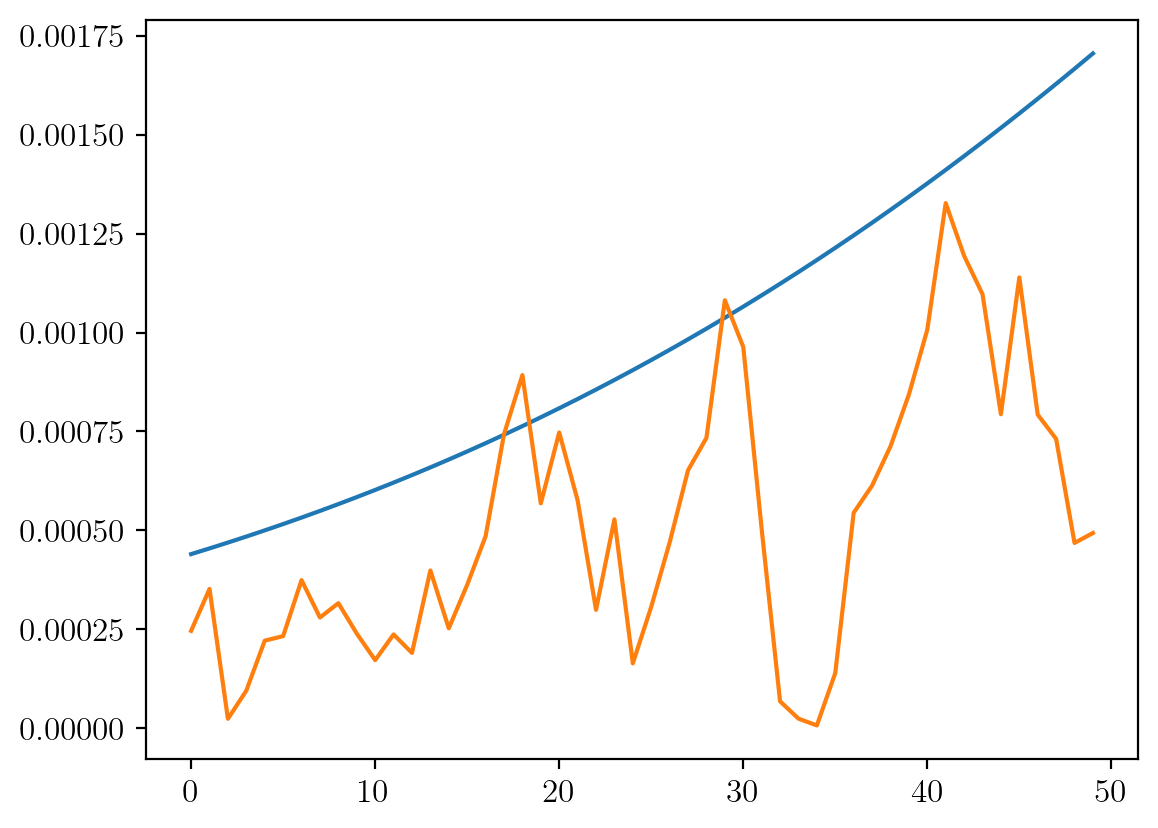

In [139]:
plt.plot(std)
plt.plot(err)
plt.show()

## Tuning

lambda**:  -2.00885986328125


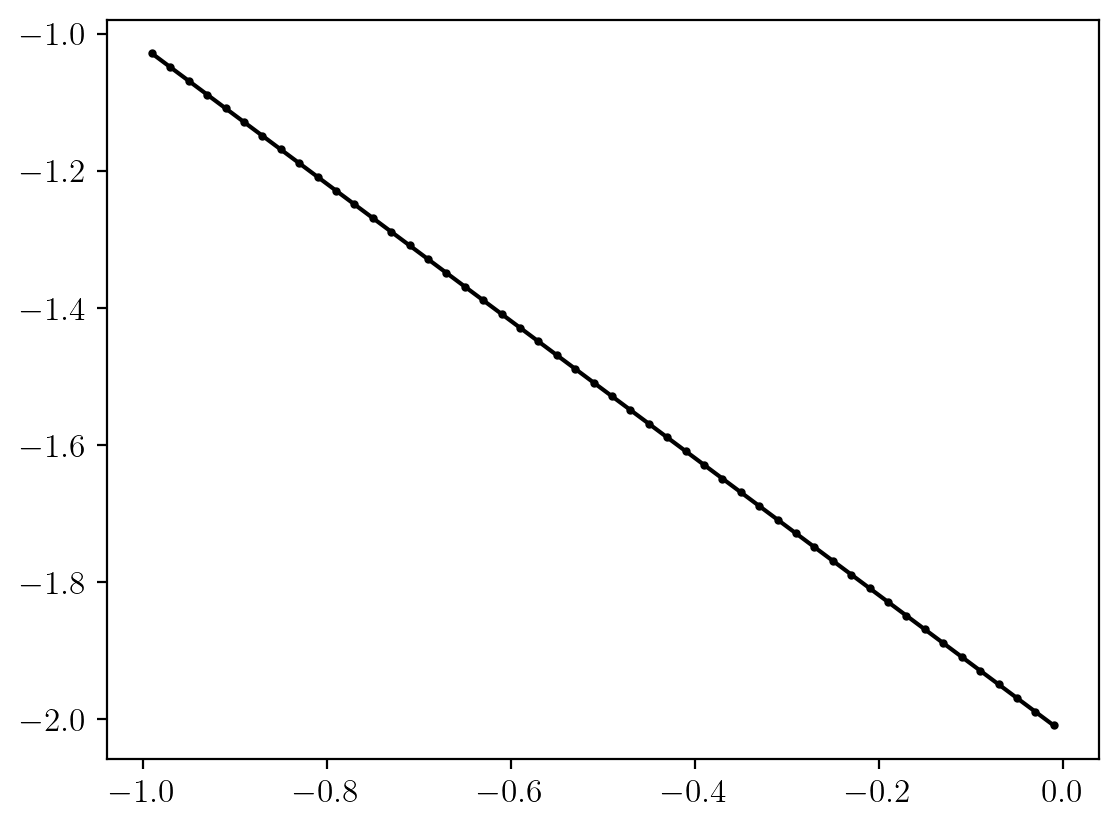

In [4]:
tune_df = ip.tune(ZTest1D, g)
print("lambda**: ", tune_df["lams"].min())
plt.plot(g.df["theta0"], tune_df["lams"], "k-o", markersize=2)
plt.show()

## Adagrid Tuning

In [5]:
g = ip.cartesian_grid(theta_min=[-1], theta_max=[1], null_hypos=[ip.hypo("x0 < 0")])
ada, reports = ip.ada_tune(ZTest1D, g, nB=5)

{
    'i': 1,
    'bias_tie': '0.000049',
    'std_tie': '0.000313',
    'spread_tie': '0.000977',
    'grid_cost': '0.019327',
    'n_refine': 1,
    'n_deepen': 0,
    'n_finished': 0,
    'n_impossible': 0,
    'lamss': '-1.985793',
    'B_lamss_min': '-2.014259',
    'B_lamss_max': '-1.915074',
    'tie_{k}(lamss)': '0.005493'
}

{
    'i': 2,
    'bias_tie': '0.000024',
    'std_tie': '0.000760',
    'spread_tie': '0.002441',
    'grid_cost': '0.012713',
    'n_refine': 1,
    'n_deepen': 1,
    'n_finished': 0,
    'n_impossible': 0,
    'lamss': '-1.954579',
    'B_lamss_min': '-1.974801',
    'B_lamss_max': '-1.923409',
    'tie_{k}(lamss)': '0.012085'
}

{
    'i': 3,
    'bias_tie': '-0.000122',
    'std_tie': '0.001417',
    'spread_tie': '0.004639',
    'grid_cost': '0.007336',
    'n_refine': 1,
    'n_deepen': 2,
    'n_finished': 0,
    'n_impossible': 0,
    'lamss': '-1.963464',
    'B_lamss_min': '-2.002300',
    'B_lamss_max': '-1.918043',
    'tie_{k}(lamss)': '0.017456'
}

{
    'i': 4,
    'bias_tie': '-0.000098',
    'std_tie': '0.001640',
    'spread_tie': '0.005371',
    'grid_cost': '0.003945',
    'n_refine': 1,
    'n_deepen': 3,
    'n_finished': 0,
    'n_impossible': 0,
    'lamss': '-1.959059',
    'B_lamss_min': '-2.015432',
    'B_lamss_max': '-1.911305',
    'tie_{k}(lamss)': '0.020874'
}

{
    'i': 5,
    'bias_tie': '0.000146',
    'std_tie': '0.001613',
    'spread_tie': '0.005493',
    'grid_cost': '0.002046',
    'n_refine': 1,
    'n_deepen': 4,
    'n_finished': 0,
    'n_impossible': 0,
    'lamss': '-1.944948',
    'B_lamss_min': '-2.027439',
    'B_lamss_max': '-1.907838',
    'tie_{k}(lamss)': '0.022827'
}

{
    'i': 6,
    'bias_tie': '0.000220',
    'std_tie': '0.001792',
    'spread_tie': '0.006104',
    'grid_cost': '0.001042',
    'n_refine': 2,
    'n_deepen': 4,
    'n_finished': 0,
    'n_impossible': 0,
    'lamss': '-1.949910',
    'B_lamss_min': '-2.018049',
    'B_lamss_max': '-1.893726',
    'tie_{k}(lamss)': '0.023804'
}

{
    'i': 7,
    'bias_tie': '0.000513',
    'std_tie': '0.001496',
    'spread_tie': '0.004883',
    'grid_cost': '0.000526',
    'n_refine': 3,
    'n_deepen': 5,
    'n_finished': 0,
    'n_impossible': 0,
    'lamss': '-1.952397',
    'B_lamss_min': '-2.012593',
    'B_lamss_max': '-1.918901',
    'tie_{k}(lamss)': '0.024292'
}

In [6]:
import scipy.stats

g = ip.Grid(ada.tiledb.get_all())
ga = g.subset(g.df["active"])
lamss = ga.df["lams"].min()
true_err = 1 - scipy.stats.norm.cdf(-lamss)
lamss, true_err

(-1.9537866115570068, 0.02536322914037914)

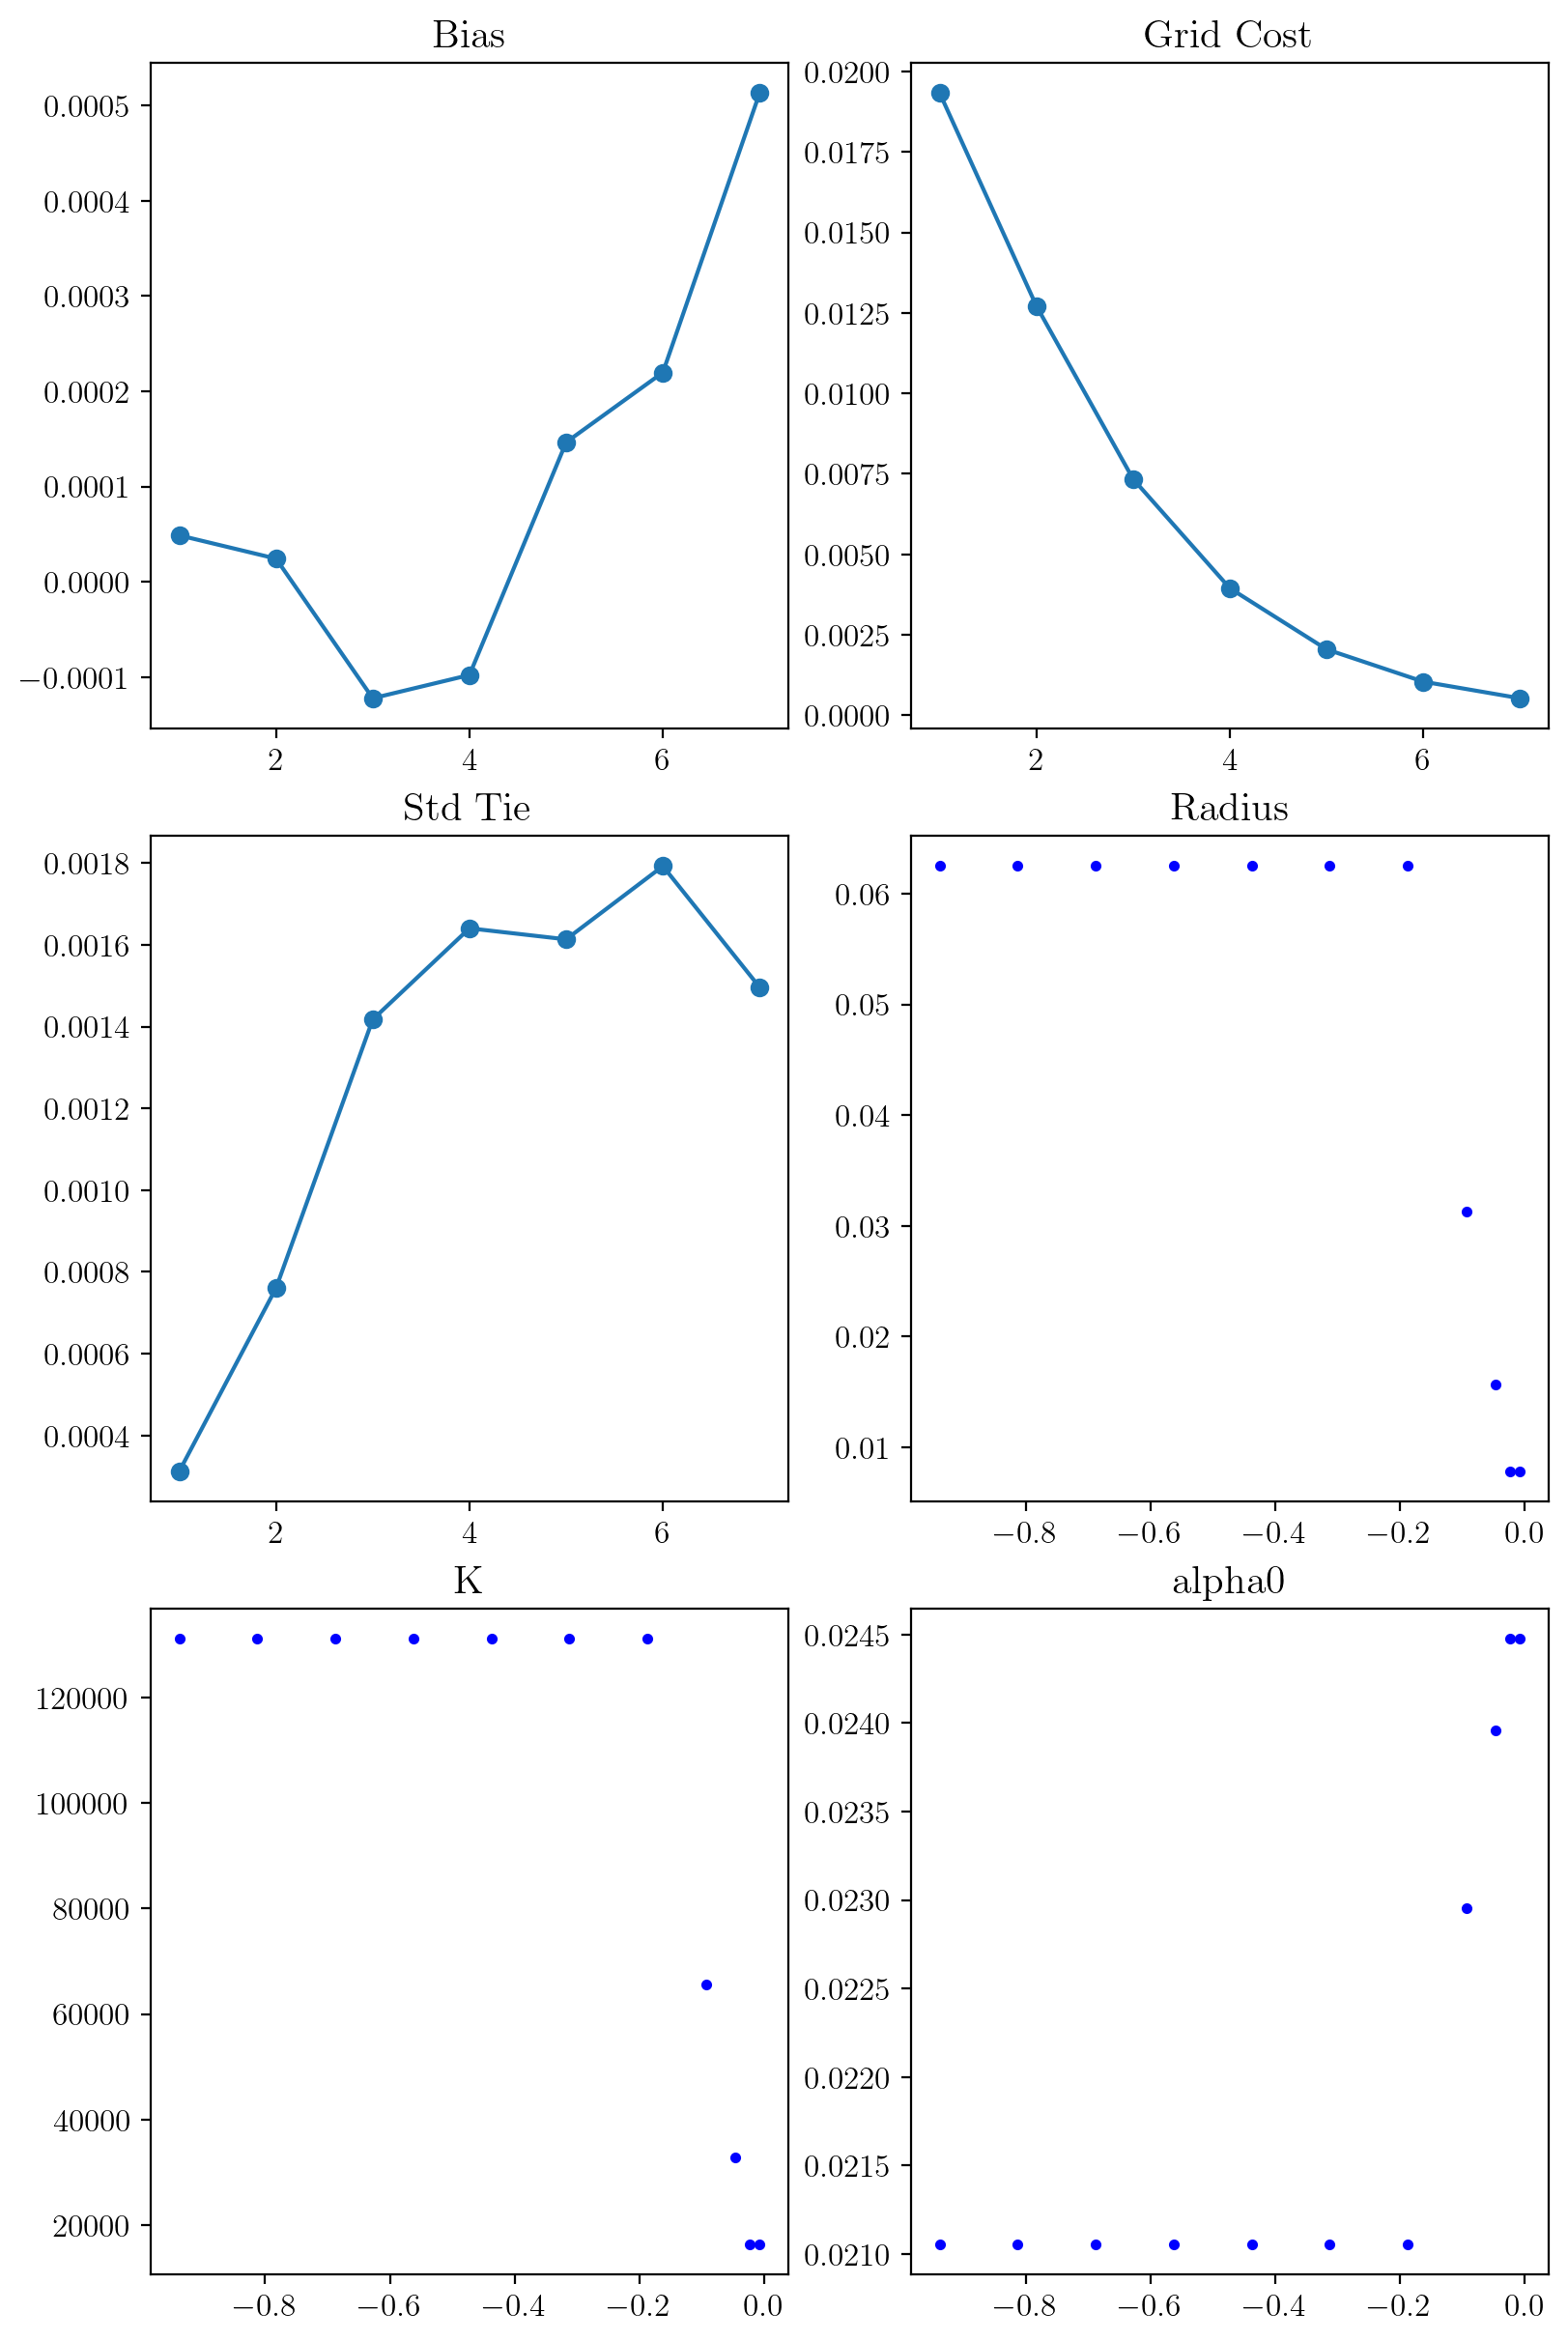

In [7]:
evolution = pd.DataFrame(reports)
# Figure plotting bias, grid_cost and std_tie
fig, ax = plt.subplots(3, 2, figsize=(8, 12), constrained_layout=True)
ax[0][0].plot(evolution["i"], evolution["bias_tie"], "o-")
ax[0][0].set_title("Bias")
ax[0][1].plot(evolution["i"], evolution["grid_cost"], "o-")
ax[0][1].set_title("Grid Cost")
ax[1][0].plot(evolution["i"], evolution["std_tie"], "o-")
ax[1][0].set_title("Std Tie")
ax[1][1].plot(ga.get_theta()[:, 0], ga.get_radii()[:, 0], "bo", markersize=3)
ax[1][1].set_title("Radius")
ax[2][0].plot(ga.get_theta()[:, 0], ga.df["K"], "bo", markersize=3)
ax[2][0].set_title("K")
ax[2][1].plot(ga.get_theta()[:, 0], ga.df["alpha0"], "bo", markersize=3)
ax[2][1].set_title("alpha0")
plt.show()